In [96]:
# General
# ! pip install biosppy
# ! pip install neurokit2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import neurokit2 as nk
from pprint import pprint

# ML

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching
import Components.Feature_Engineering as Feature_Engineering


# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(Normalisation)
importlib.reload(data_fetching)
importlib.reload(Feature_Engineering)

<module 'Components.Feature_Engineering' from '../Components/Feature_Engineering.py'>

# Data

In [2]:
X, y = data_fetching.get_train_data()
#x_test = data_fetching.get_test_data()

# Feature extraction

In [97]:
f = Feature_Engineering.extract_features_parrallel(X.iloc[0:100])

Index failed:  62


/opt/conda/lib/python3.7/site-packages/neurokit2/signal/signal_period.py:62: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  category=NeuroKitWarning


Index failed:  76
<class 'list'>
<class 'list'>


In [101]:
tuples = [(index,row.dropna()) for index,row in X.iloc[0:100].iterrows()]
pprint(tuples)

[(0,
  0      -863.0
1      -860.0
2      -857.0
3      -854.0
4      -851.0
        ...  
3296     84.0
3297    118.0
3298    147.0
3299    188.0
3300    231.0
Name: 0, Length: 3301, dtype: float64),
 (1,
  0      -137.0
1      -132.0
2      -123.0
3      -107.0
4       -79.0
        ...  
8665    -47.0
8666    -46.0
8667    -45.0
8668    -44.0
8669    -43.0
Name: 1, Length: 8670, dtype: float64),
 (2,
  0      -727.0
1      -736.0
2      -748.0
3      -784.0
4      -831.0
        ...  
8391     30.0
8392      7.0
8393     -7.0
8394    -19.0
8395    -34.0
Name: 2, Length: 8396, dtype: float64),
 (3,
  0      -103.0
1       -98.0
2       -92.0
3       -87.0
4       -81.0
        ...  
8524    103.0
8525     99.0
8526     94.0
8527     88.0
8528     82.0
Name: 3, Length: 8529, dtype: float64),
 (4,
  0         8.0
1         2.0
2        -1.0
3        -3.0
4        -5.0
        ...  
3523    292.0
3524    283.0
3525    272.0
3526    257.0
3527    233.0
Name: 4, Length: 3528, dtype: float

In [ ]:
pprint(f)

In [89]:
import time

start = time.time()
f = Feature_Engineering.extract_features(X)
end = time.time()
print("Multi-process time: ", end - start)

start = time.time()
f = Feature_Engineering.extract_features(X.iloc[0:100])
end = time.time()
print("Un-threaded time: ", end - start)

# print(f)

Index failed:  62


/opt/conda/lib/python3.7/site-packages/neurokit2/signal/signal_period.py:62: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  category=NeuroKitWarning


Index failed:  76
<class 'list'>
<class 'list'>
Threaded time:  8.367388725280762
0
Index failed:  45
Index failed:  51
Index failed:  52
Index failed:  62


/opt/conda/lib/python3.7/site-packages/neurokit2/signal/signal_period.py:62: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  category=NeuroKitWarning


Index failed:  76
Un-threaded time:  64.98824977874756


# Testing

In [ ]:
# nk.ecg_process(X.iloc[62].dropna(), sampling_rate=300)
# plt.plot(nk.ecg_clean(X.iloc[62], sampling_rate=300))
# plt.plot(nk.ecg_clean(X.iloc[62].dropna(), sampling_rate=300))

# nk.ecg_process(nk.ecg_clean(X.iloc[62].dropna(), sampling_rate=300), sampling_rate=300)




# ecg_process.py
method = "neurokit"
sampling_rate = 300
ecg_signal = X.iloc[62].dropna()
ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling_rate, method=method)
instant_peaks, rpeaks, = nk.ecg_peaks(
        ecg_cleaned=ecg_cleaned, sampling_rate=sampling_rate, method=method, correct_artifacts=True
    )
desired_length = len(ecg_cleaned)
print(desired_length)
print(np.arange(desired_length))
rate = nk.signal_rate(rpeaks, sampling_rate=sampling_rate, desired_length=len(ecg_cleaned))

#




In [51]:
signal = X.iloc[62:64]
# plt.plot(signal)
f = Feature_Engineering.extract_features(signal)
print(f)

Index failed:  62
          0            1             2           3             4   \
0  59.617834  3808.565217  5.770108e+06  356.727273  15614.834711   

            5             6           7            8            9   ...  \
0  4060.740741  5.548657e+06  301.961538  1046.113905  4076.703704  ...   

           61          62          63          64         65           66  \
0  125.130435  165.852552  104.391304  649.716446  90.826087  1143.534972   

          67          68   69   70  
0  37.043478  467.606805  0.0  0.0  

[1 rows x 71 columns]


In [159]:
import copy as cp

test = [[141, 405, 658, 1476, 1746, 2009, 2267, 2522, 2780, 3026],
 [170, 431, 678, 954, 1498, 1761, 2031, 2291, 2554, 2803, 3046],
 [183, 446, 706, 969, 1237, 1517, 1783, 2050, 2306, 2566, 2817, 3068],
 [209, 465, 746, 998, 1257, 1536, 1809, 2069, 2326, 2583, 2839, 3087],
 [288, 502, 803, 1084, 1289, 1572, 1852, 2109, 2685, 2872, 3124]]

print("Test 1:")
t1 = cp.deepcopy(test)
t1[0][0] = None
pprint(t1)
t1[0].pop(0)
pprint(peaks_cleaning(t1))

print("\nTest 2:")
t2 = cp.deepcopy(test)
t2[2][5] = None
pprint(t2)
t2[2].pop(5)
pk2 = peaks_cleaning(t2)
pprint(pk2)

# p_t2 = peaks_cleaning(t2)
# print(np.array(p_t2[-1])-np.array(p_t2[0]))

Test 1:
[[None, 405, 658, 1476, 1746, 2009, 2267, 2522, 2780, 3026],
 [170, 431, 678, 954, 1498, 1761, 2031, 2291, 2554, 2803, 3046],
 [183, 446, 706, 969, 1237, 1517, 1783, 2050, 2306, 2566, 2817, 3068],
 [209, 465, 746, 998, 1257, 1536, 1809, 2069, 2326, 2583, 2839, 3087],
 [288, 502, 803, 1084, 1289, 1572, 1852, 2109, 2685, 2872, 3124]]
[[405, 658, 1476, 1746, 2009, 2522, 2780, 3026],
 [431, 678, 1498, 1761, 2031, 2554, 2803, 3046],
 [446, 706, 1517, 1783, 2050, 2566, 2817, 3068],
 [465, 746, 1536, 1809, 2069, 2583, 2839, 3087],
 [502, 803, 1572, 1852, 2109, 2685, 2872, 3124]]

Test 2:
[[141, 405, 658, 1476, 1746, 2009, 2267, 2522, 2780, 3026],
 [170, 431, 678, 954, 1498, 1761, 2031, 2291, 2554, 2803, 3046],
 [183, 446, 706, 969, 1237, None, 1783, 2050, 2306, 2566, 2817, 3068],
 [209, 465, 746, 998, 1257, 1536, 1809, 2069, 2326, 2583, 2839, 3087],
 [288, 502, 803, 1084, 1289, 1572, 1852, 2109, 2685, 2872, 3124]]
[[141, 405, 658, 1746, 2009, 2522, 2780, 3026],
 [170, 431, 678, 1761, 

In [210]:
nk.ecg_process(X.iloc[62].dropna(), sampling_rate=300)

ValueError: `x` must be strictly increasing sequence.

/opt/conda/lib/python3.7/site-packages/biosppy/plotting.py:960: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  gs.tight_layout(fig)


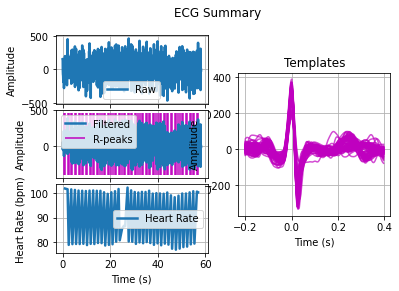

ReturnTuple(ts=array([0.00000000e+00, 3.33314230e-03, 6.66628460e-03, ...,
       5.81500006e+01, 5.81533337e+01, 5.81566669e+01]), filtered=array([ 6.48712154e+00,  1.07411279e+01,  1.47387895e+01, ...,
       -1.86092837e+01, -1.03572822e+01, -4.79262775e-16]), rpeaks=array([  160,   304,   626,   771,  1089,  1234,  1551,  1697,  2009,
        2156,  2469,  2615,  2930,  3077,  3394,  3539,  3855,  4002,
        4311,  4458,  4767,  4914,  5224,  5373,  5689,  5837,  6147,
        6295,  6607,  6753,  7055,  7202,  7501,  7744,  7887,  8189,
        8337,  8639,  8786,  9094,  9243,  9550,  9698, 10001, 10150,
       10458, 10605, 10909, 11057, 11367, 11517, 11824, 11972, 12281,
       12431, 12742, 12890, 13197, 13346, 13659, 13810, 14136, 14285,
       14614, 14762, 15085, 15232, 15555, 15703, 16018, 16165, 16477,
       16624, 16934, 17082]), templates_ts=array([-2.00000000e-01, -1.96666667e-01, -1.93333333e-01, -1.90000000e-01,
       -1.86666667e-01, -1.83333333e-01, -1.8000000

In [207]:
import biosppy.signals.ecg as ecg
ecg.ecg(signal=X.iloc[62].dropna(), sampling_rate=300.0)